In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools,bathy_tools)
import matplotlib.cm as cm
import os
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [2]:
grid1 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc','r')

In [3]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/particle/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/particle/ariane_trajectories_qualitative.nc','r')

In [36]:
def compare_tracks_more(f1,f2,grid1,grid2,i):
    """This function was made to compare particle trajectories
        between nowcasts & deepened case and nowcasts with same 
        TS initial & deepended case
        f1: deepened case
        f2: nowcasts 
        f3: nowcasts with same TS for deepend case
        return the figure"""
    fig, axs = plt.subplots(1,1,figsize=(6,6))
    n = np.arange(2)
    #grid = [grid1, grid2]
    colors = ['b','m']
    legd = [ 'Baseline','long river']
    ## for first comparison
    f = [f1,f2]
    for ff, le, c in zip(f, legd, colors):
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        axs.scatter(lont[1:,i],latt[1:,i],color=c, label = le, s = 25)
        axs.plot(lont[0,i],latt[0,i],'sr')
        axs.legend(loc = 2)
        viz_tools.plot_coastline(axs,grid1,coords='map',color='m')
        viz_tools.plot_coastline(axs,grid2,coords='map', color='b')
        axs.set_xlim([-123.8,-122.8])
        axs.set_ylim([48.8,49.3])
        axs.set_xlabel('Longitude')
        axs.set_ylabel('Latitude')
    return fig

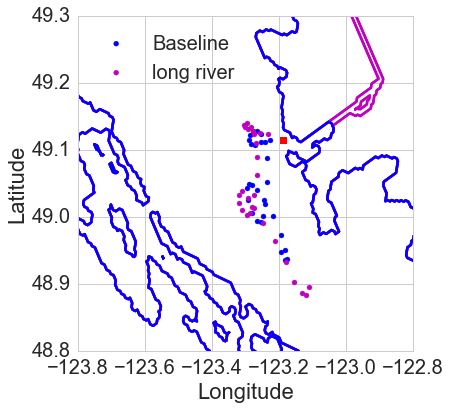

In [37]:
fig = compare_tracks_more(f1,f2, grid1,grid2, 0)